<a href="https://colab.research.google.com/github/eunzzae/PJT_C.lab/blob/main/240131_%EC%BB%A4%EB%84%A5%EC%B8%A0%EB%9E%A9_simple_EDA(2)_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/data/connects_lab/버전관리/'
customer_df = pd.read_excel(base_path+'Data_1_Simulated_Customer_Data_50k.xlsx')
course_df = pd.read_excel(base_path+'Data_2_TalkD_coursemap_v2.xlsx')

In [ ]:
customer_df.head()

,Name,Age,Child_Age_Months,Number_of_Children,Gender,Child_1_Gender,Child_2_Gender,Child_3_Gender,Parenting_Concerns,Parenting_Stress_Level,Parenting_Letter,Child_1_Age_Months,Child_2_Age_Months,Child_3_Age_Months
0,조서연,30,3,1,Female,Male,NaN,NaN,"['건강', '감정표현', '양육법']",5,"육아에 대한 고민을 나누고 싶어 글을 씁니다, 저는 30세의 엄마입니다. 양육의 어...",3,NaN,NaN
1,최하은,34,42,1,Female,Female,NaN,NaN,"['수면', '부모역할', '양육 스트레스']",5,"안녕하세요, 저는 34세의 엄마입니다. 지치고 막막함을 느끼고 있습니다. 제 육아 ...",42,NaN,NaN
2,이현우,34,27,1,Male,Female,NaN,NaN,"['발달', '상호작용', '양육 스트레스']",4,"안녕하세요, 저는 34세의 아빠입니다. 이러한 상황이 저를 매우 우울하게 만듭니다....",27,NaN,NaN
3,장예은,36,47,2,Female,Female,Female,NaN,"['양육 스트레스', '수면', '감정표현']",4,이 글을 통해 도움을 구하고자 합니다. 저는 36세의 엄마입니다. 양육의 어려움에 ...,67,47.0,NaN
4,최예은,32,22,3,Female,Female,Female,Male,"['관계', '감정표현', '부모역할']",1,"안녕하세요, 저는 32세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. 제 육아...",120,72.0,22.0


# 한글 글꼴 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 확인

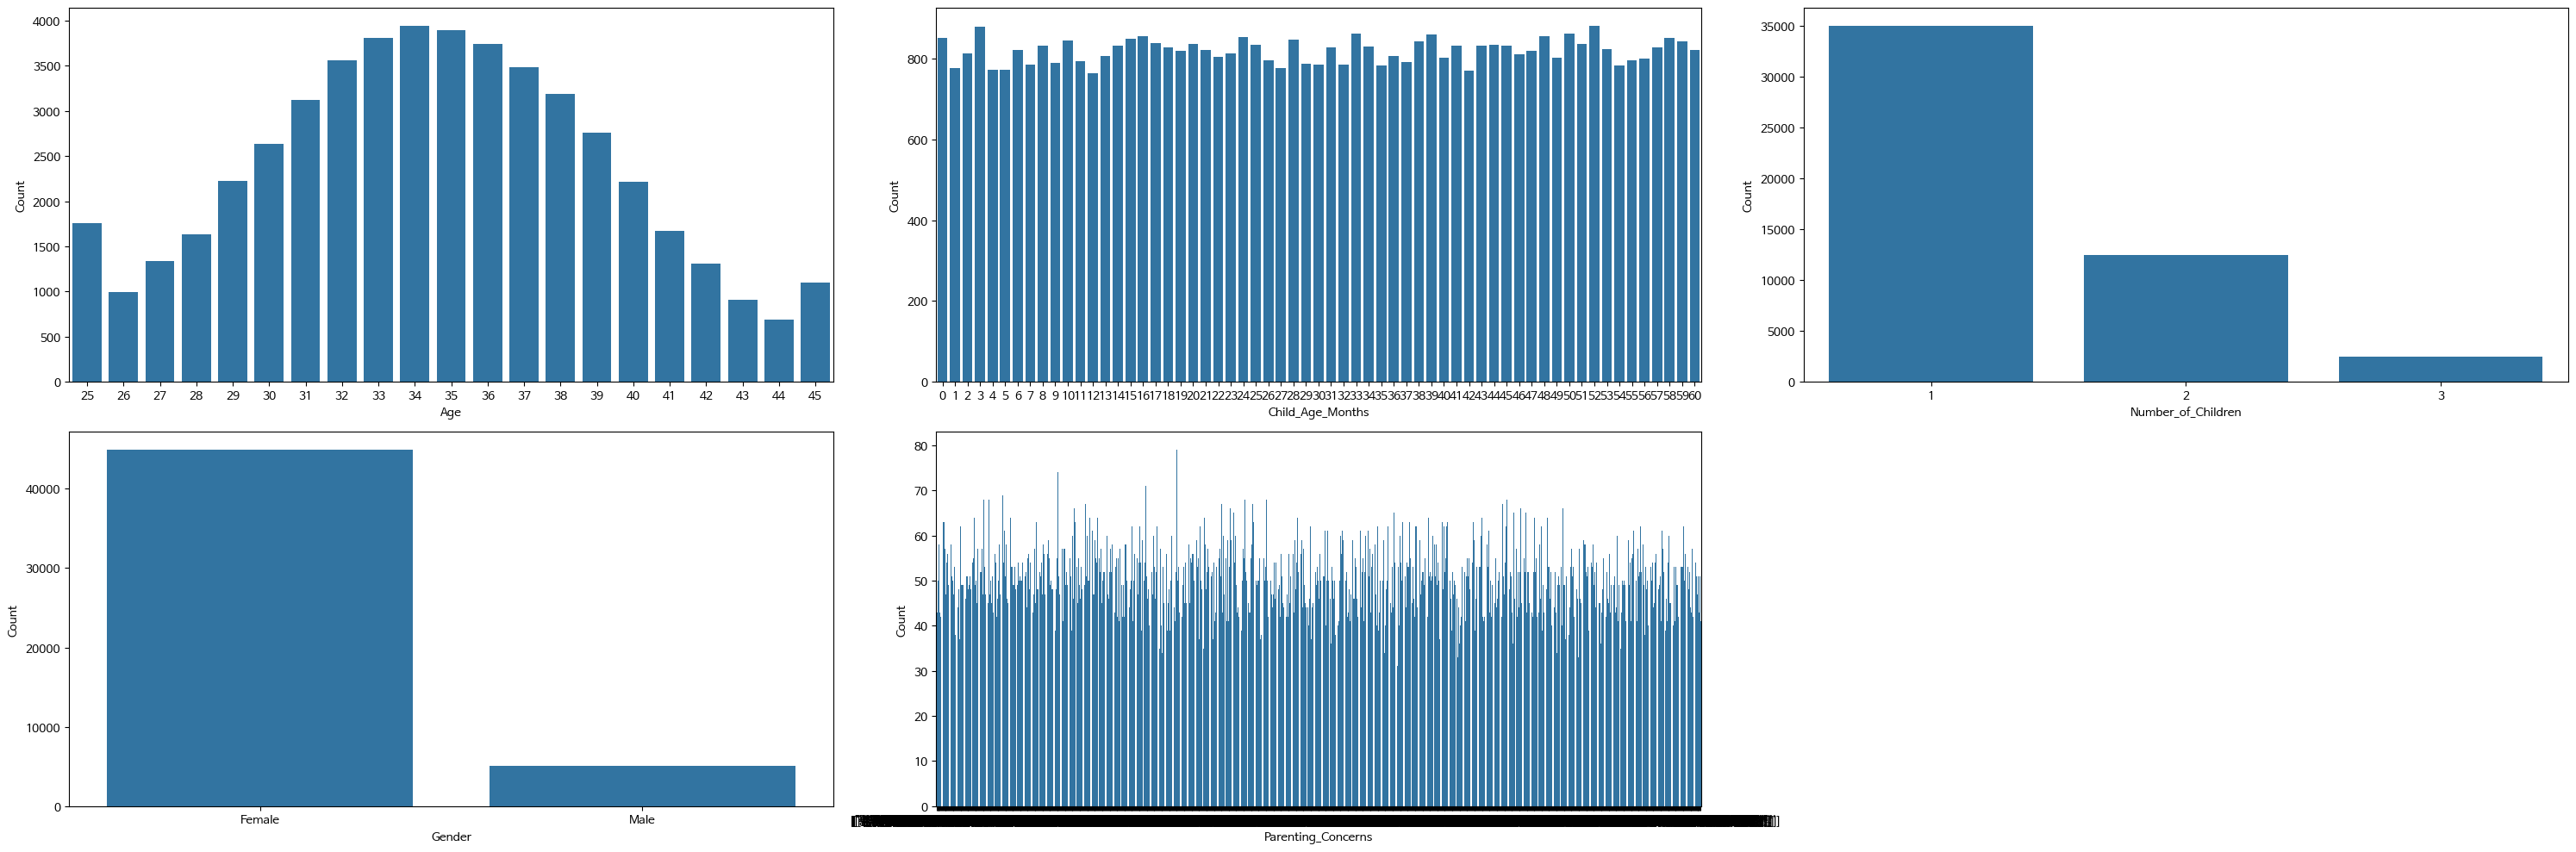

In [ ]:
cols_to_visualize = ['Age', 'Child_Age_Months', 'Number_of_Children','Gender','Parenting_Concerns']

plt.figure(figsize=(30,10))
for i, col in enumerate(cols_to_visualize):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=customer_df)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# 각 컬럼별 결측치 개수 확인
missing_values = customer_df.isnull().sum()
missing_values

Name                          0
Age                           0
Child_Age_Months              0
Number_of_Children            0
Gender                        0
Child_1_Gender                0
Child_2_Gender            35043
Child_3_Gender            47526
Parenting_Concerns            0
Parenting_Stress_Level        0
Parenting_Letter              0
Child_1_Age_Months            0
Child_2_Age_Months        35043
Child_3_Age_Months        47526
dtype: int64

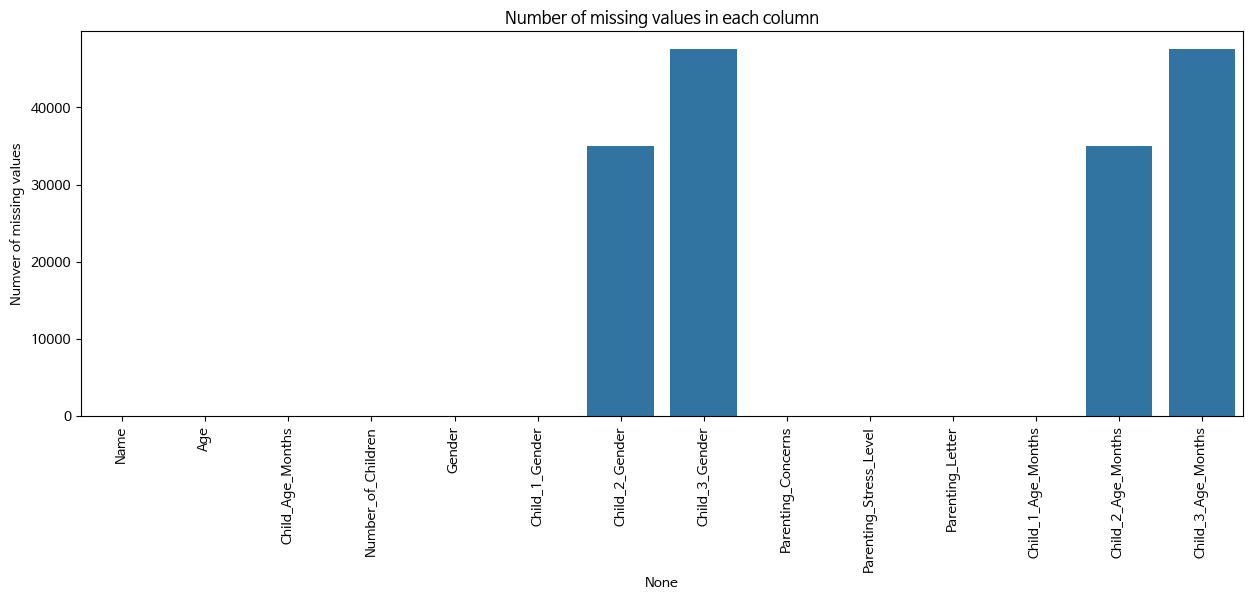

In [ ]:
#결측치확인
missing_data = customer_df.isnull().sum()

# 시각화
plt.figure(figsize= (15,5))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.ylabel('Numver of missing values')
plt.title('Number of missing values in each column')
plt.show()

<ipython-input-11-bfe744010ea4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_df[['Age', 'Child_Age_Months', 'Number_of_Children','Gender','Parenting_Concerns', 'Parenting_Stress_Level','Parenting_Letter']].corr()


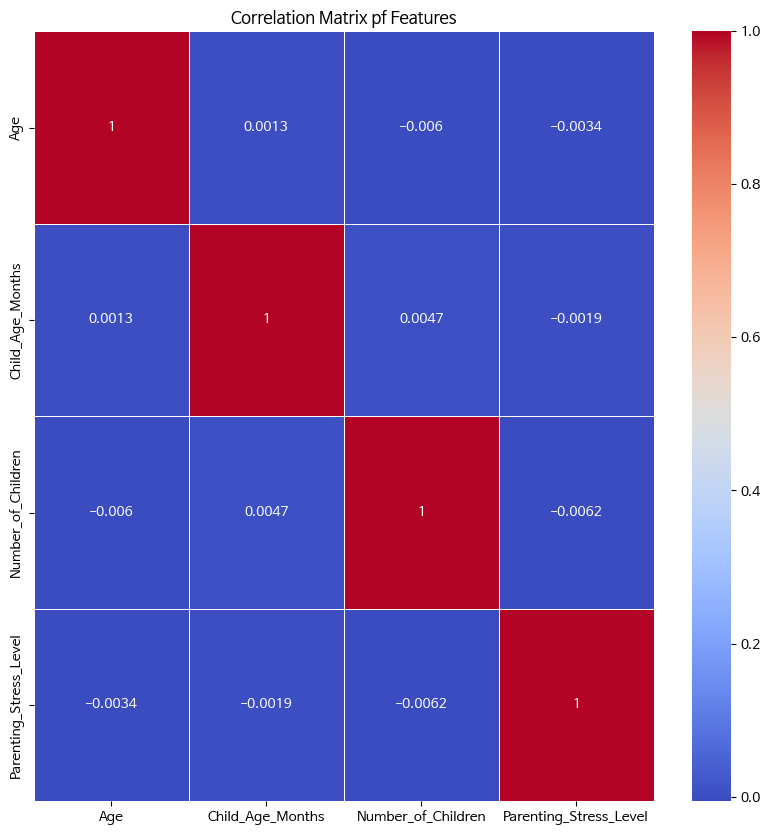

In [ ]:
# 주요 특성들 간 상관 관계 확인
correlation_matrix = customer_df[['Age', 'Child_Age_Months', 'Number_of_Children','Gender','Parenting_Concerns', 'Parenting_Stress_Level','Parenting_Letter']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix pf Features')

plt.show()

# 텍스트 전처리

## 데이터셋 내 중복 제거

In [ ]:
customer_dup = customer_df.drop_duplicates(['Parenting_Concerns']).reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수 : {len(customer_dup)}')

필터링된 데이터셋 총 개수 : 990


In [ ]:
# 길이가 너무 짧은 데이터 제거
# 문장 내 길이가 너무 짧은 단어 제거
customer_df['Parenting_Letter'] = customer_df['Parenting_Letter'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
customer_df['Parenting_Letter']

0        육아에 고민을 나누고 씁니다, 30세의 엄마입니다. 양육의 어려움에 직면하고 있습니...
1        안녕하세요, 34세의 엄마입니다. 지치고 막막함을 느끼고 있습니다. 고민은 아이가 ...
2        안녕하세요, 34세의 아빠입니다. 이러한 상황이 우울하게 만듭니다. 고민은 아이의 ...
3        도움을 구하고자 합니다. 36세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. ...
4        안녕하세요, 32세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. 고민은 아이와...
                               ...                        
49995    안녕하세요, 32세의 엄마입니다. 이러한 상황이 우울하게 만듭니다. 고민은 연속된 ...
49996    도움을 구하고자 합니다. 34세의 엄마입니다. 이러한 상황이 우울하게 만듭니다. 고...
49997    안녕하세요, 36세의 엄마입니다. 지치고 막막함을 느끼고 있습니다. 고민은 아이가 ...
49998    안녕하세요, 35세의 엄마입니다. 이러한 상황이 우울하게 만듭니다. 고민은 아이와의...
49999    육아에 고민을 나누고 씁니다, 32세의 엄마입니다. 양육의 어려움에 직면하고 있습니...
Name: Parenting_Letter, Length: 50000, dtype: object

In [ ]:
# 전체 길이가 10이하이거나 단어가 5개 이하인 데이터 제거
customer_df = customer_df[customer_df.Parenting_Letter.apply(lambda x: len(str(x)) > 10 and len(str(x).split()) > 5)].reset_index(drop=True)
customer_df

,Name,Age,Child_Age_Months,Number_of_Children,Gender,Child_1_Gender,Child_2_Gender,Child_3_Gender,Parenting_Concerns,Parenting_Stress_Level,Parenting_Letter,Child_1_Age_Months,Child_2_Age_Months,Child_3_Age_Months
0,조서연,30,3,1,Female,Male,NaN,NaN,"['건강', '감정표현', '양육법']",5,"육아에 고민을 나누고 씁니다, 30세의 엄마입니다. 양육의 어려움에 직면하고 있습니...",3,NaN,NaN
1,최하은,34,42,1,Female,Female,NaN,NaN,"['수면', '부모역할', '양육 스트레스']",5,"안녕하세요, 34세의 엄마입니다. 지치고 막막함을 느끼고 있습니다. 고민은 아이가 ...",42,NaN,NaN
2,이현우,34,27,1,Male,Female,NaN,NaN,"['발달', '상호작용', '양육 스트레스']",4,"안녕하세요, 34세의 아빠입니다. 이러한 상황이 우울하게 만듭니다. 고민은 아이의 ...",27,NaN,NaN
3,장예은,36,47,2,Female,Female,Female,NaN,"['양육 스트레스', '수면', '감정표현']",4,도움을 구하고자 합니다. 36세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. ...,67,47.0,NaN
4,최예은,32,22,3,Female,Female,Female,Male,"['관계', '감정표현', '부모역할']",1,"안녕하세요, 32세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. 고민은 아이와...",120,72.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,정혜진,32,37,2,Female,Female,Male,NaN,"['양육 스트레스', '학습지도', '양육법']",4,"안녕하세요, 32세의 엄마입니다. 이러한 상황이 우울하게 만듭니다. 고민은 연속된 ...",87,37.0,NaN
49996,최지은,34,20,1,Female,Male,NaN,NaN,"['수면', '식습관', '상호작용']",5,도움을 구하고자 합니다. 34세의 엄마입니다. 이러한 상황이 우울하게 만듭니다. 고...,20,NaN,NaN
49997,최혜진,36,52,2,Female,Male,Male,NaN,"['건강', '양육 스트레스', '수면']",5,"안녕하세요, 36세의 엄마입니다. 지치고 막막함을 느끼고 있습니다. 고민은 아이가 ...",118,52.0,NaN
49998,김하은,35,58,1,Female,Male,NaN,NaN,"['양육법', '상호작용', '관계']",3,"안녕하세요, 35세의 엄마입니다. 이러한 상황이 우울하게 만듭니다. 고민은 아이와의...",58,NaN,NaN


## 문장 토큰화

In [ ]:
!pip install konlpy

In [ ]:
import konlpy
from konlpy.tag import Okt

# Initialize the Okt tokenizer
okt = Okt()

# Function to tokenize the text and extract words of length 2
def extract_two_letter_words(text):
    tokens = okt.morphs(text)
    two_letter_words = [word for word in tokens if len(word) == 2]
    return two_letter_words

# Apply the function to the 'Parenting_Letter' column
customer_df['Two_Letter_Words'] = customer_df['Parenting_Letter'].apply(extract_two_letter_words)

# Display the results
customer_df[['Parenting_Letter', 'Two_Letter_Words']].head()


,Parenting_Letter,Two_Letter_Words
0,"육아에 고민을 나누고 씁니다, 30세의 엄마입니다. 양육의 어려움에 직면하고 있습니...","[육아, 고민, 30, 엄마, 양육, 직면, 하고, 고민, 아이, 면역, 보여, 방..."
1,"안녕하세요, 34세의 엄마입니다. 지치고 막막함을 느끼고 있습니다. 고민은 아이가 ...","[34, 엄마, 고민, 아이, 낮잠, 않아, 패턴, 개선, 하고, 연속, 양육, 책..."
2,"안녕하세요, 34세의 아빠입니다. 이러한 상황이 우울하게 만듭니다. 고민은 아이의 ...","[34, 아빠, 상황, 고민, 아이, 단계, 평균, 보다, 같아, 발달, 방법, 연..."
3,도움을 구하고자 합니다. 36세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. ...,"[도움, 36, 엄마, 양육, 직면, 하고, 고민, 연속, 양육, 책임, 자신, 시..."
4,"안녕하세요, 32세의 엄마입니다. 양육의 어려움에 직면하고 있습니다. 고민은 아이와...","[32, 엄마, 양육, 직면, 하고, 고민, 아이, 와의, 개선, 방법, 아이, 조..."


## 데이터 분포 확인

In [ ]:
# # 불용어 정의
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# customer = list(customer['Parenting_Letter'])

In [ ]:
# # 형태소 분석기 OKT를 사용한 토큰화 작업
# okt = Okt()

# tokenized_data = []

# for sentence in customer:
#     temp_X = okt.morphs(sentence, stem=True) # 토큰화
#     temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
#     tokenized_data.append(temp_X)

In [ ]:
# print('고민의 최대 길이 : ', max(len(concern) for concern in tokenized_data))
# print('고민의 평균 길이 : ', sum(map(len, tokenized_data))/len(tokenized_data))
# plt.hist([len(concern) for concern in tokenized_data], bins=20)
# plt.xlabel('length of samples')
# plt.ylabel('number of samples')
# plt.show()

## 워드 임베딩 구축

In [ ]:
from gensim.models import Word2Vec

* gensim에서 제공하는 Word2Vec 모듈을 사용하여 토큰화 된 고민 데이터를 학습한다.

In [ ]:
embedding_dim = 100

# "100차원의 벡터로 모델을 초기화하고, 각 중심 단어 주변에서 앞뒤로 5개의 단어를 살펴보며 첫 번째 에포크의 학습을 수행합니다."

model = Word2Vec(
    sentences = customer_df['Two_Letter_Words'],
    vector_size=embedding_dim, # size 대신 vector_size로 변경
    window=5,
    min_count=5,
    workers=4,
    epochs=100, # iter 대신 epochs로 변경
    sg=0)

In [ ]:
# 학습이 완료되면 구축한 임베딩 핼렬의 크기 확인
print(model.wv.vectors.shape)

(63, 100)


* 단어 사전에는 총 95개의 단어가 존재하며, 각각의 단어는 미리 설정한 embedding_dim=100 차원으로 구성되어 있음

In [ ]:
word_vectors = model.wv
vocabs = list(word_vectors.key_to_index.keys())


In [ ]:
vocabs[:100]

['아이',
 '고민',
 '엄마',
 '방법',
 '도움',
 '하고',
 '양육',
 '개선',
 '직면',
 '귀하',
 '경험',
 '공유',
 '육아',
 '구합',
 '조언',
 '상황',
 '주시',
 '와의',
 '상태',
 '거부',
 '식단',
 '편식',
 '걱정',
 '보여',
 '면역',
 '같아',
 '단계',
 '보다',
 '평균',
 '발달',
 '패턴',
 '낮잠',
 '않아',
 '있어',
 '지원',
 '해야',
 '조절',
 '시간',
 '자신',
 '책임',
 '연속',
 '아빠',
 '34',
 '35',
 '33',
 '36',
 '32',
 '37',
 '38',
 '31',
 '39',
 '30',
 '29',
 '40',
 '25',
 '41',
 '28',
 '27',
 '42',
 '45',
 '26',
 '43',
 '44']

* gensim 패키지에서 제공하는 most_similar 매소드를 사용하여, 원하는 단어와 유사한 단어들을 찾는다.

In [ ]:
for sim_word in model.wv.most_similar('양육'):
    print(sim_word)

('시간', 0.17897525429725647)
('자신', 0.12421148270368576)
('육아', 0.12411817163228989)
('책임', 0.08446313440799713)
('도움', 0.07040523737668991)
('37', 0.06198059767484665)
('27', 0.060386985540390015)
('39', 0.05877959355711937)
('25', 0.055526040494441986)
('33', 0.053237684071063995)


#워드 임베딩 시각화

## PCA 사용

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
word_vector_list = [word_vectors[word] for word in vocabs]

In [ ]:
word_vector_list[0]

array([-0.17968413, -0.96877605,  0.5278027 , -1.4793204 ,  0.01242284,
        0.37273443, -0.49903175, -0.555848  ,  1.6357281 , -0.07792214,
       -0.74756354,  2.0143929 ,  1.5123988 , -0.7682775 , -0.3108821 ,
        0.85014504, -0.9386365 ,  0.88255256,  0.15189761,  0.7096974 ,
        0.34684345, -0.29397315,  0.6653975 ,  2.0499234 ,  0.1266675 ,
       -0.6410832 ,  0.3647982 ,  0.8645909 ,  0.1058011 , -1.2718245 ,
        0.5002769 ,  0.7415599 , -0.2571042 ,  0.54615897, -0.17635287,
        0.35756394,  1.1796957 ,  0.25347432,  0.68209064, -1.0629824 ,
        0.48078135,  0.19765778,  0.11867406,  0.368111  , -0.43446168,
       -1.8831712 , -0.34981057,  0.90572995,  1.0840449 , -0.5159008 ,
       -0.5323505 ,  0.09793225,  0.16429359, -1.204947  ,  0.31611544,
        1.082913  , -0.2573808 ,  0.22693117,  0.89637774,  0.01895257,
        0.1439702 ,  0.40172306,  0.49278095, -0.8482193 ,  0.33208603,
        0.10123548, -0.04733703,  1.4843005 , -0.54133916, -0.82

In [ ]:
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

x_asix = xys[:, 0]
y_axis = xys[:, 1]

In [ ]:
! pip install adjustText

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [ ]:
def plot_pca_graph(vocabs, x_axis, y_axis):
    plt.figure(figsize=(10, 10))
    plt.scatter(x_axis, y_axis, marker='o')

    texts = []
    for i, v in enumerate(vocabs):
        texts.append(plt.text(x_axis[i], y_axis[i], v))

    adjust_text(texts)

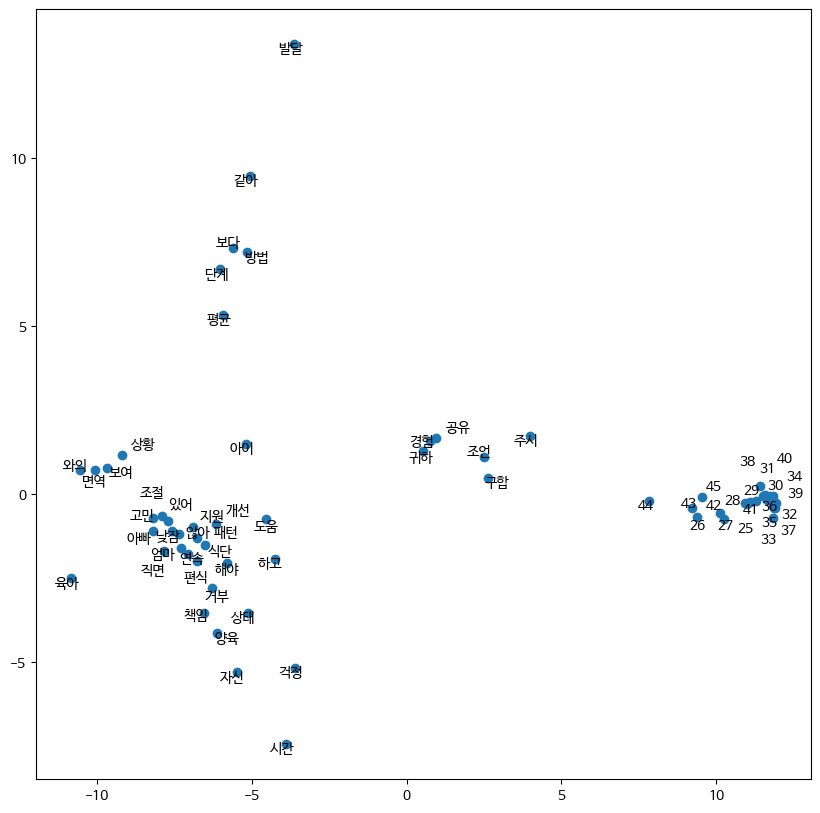

In [ ]:
plot_pca_graph(vocabs, x_asix, y_axis)